In [139]:
'''
Problem Statement:

In this exercise, You will implement an anomaly detection algorithm to detect anomalous behavior in server computers.
The features measure the through-put (mb/s) and latency (ms) of response of each server. While your servers were 
operating, you collected m = 307 examples of how they were behaving, and thus have an unlabeled dataset {x(1),...,x(m)}. 
You suspect that the vast majority of these examples are “normal” (non-anomalous) examples of the servers operating 
normally, but there might also be some examples of servers acting anomalously within this dataset.


You will use a Gaussian model to detect anomalous examples in your dataset. 
You will first start on a 2D dataset that will allow you to visualize what the algorithm is doing. 
On that dataset you will fit a Gaussian distribution and then find values that have very low probability and hence 
can be considered anomalies. After that, you will apply the anomaly detection algorithm to a larger dataset
with many dimensions.

'''

import pandas as  pd
import numpy as np
import scipy.io as sio
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

# Part 1: Load Example Dataset


Visualizing example dataset for outlier detection.




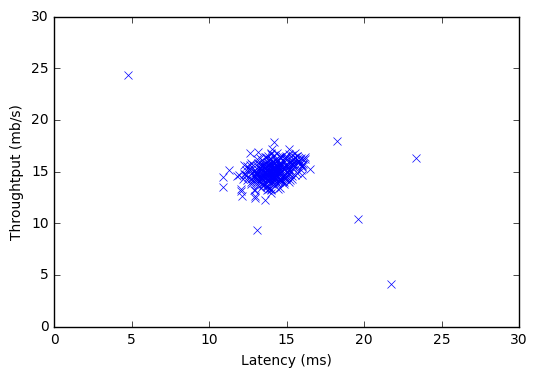

In [140]:
'''
We start this exercise by using a small dataset that is easy to visualize.
Our example case consists of 2 network server statistics across several machines: the latency and
throughput of each machine.
This exercise will help us find possibly faulty (or very fast) machines.
'''

print('\nVisualizing example dataset for outlier detection.\n\n')

data1 = sio.loadmat('ex8data1.mat')
Xtrain = data1['X']

# Cross Validation DataSet
XCV = data1['Xval']
yCV = data1['yval']


# plotting the X data 
plt.plot(Xtrain[:,0],Xtrain[:,1],'bx')

# plot aesthetics
plt.xlabel('Latency (ms)')
plt.ylabel('Throughtput (mb/s)')
plt.xlim([0,30])
plt.ylim([0,30])

plt.show()

# Part 2: Estimate the Dataset Statistics 

In [141]:
'''
For this exercise, we assume a Gaussian distribution for the dataset.

We first estimate the parameters of our assumed Gaussian distribution, then compute the probabilities 
for each of the points and then visualize both the overall distribution and where each of the points falls in 
terms of that distribution.
'''

# Estimate mean ('mu') and variance ('sigma2')
mu = np.mean(Xtrain,axis=0)
sigma2 = np.var(Xtrain,axis=0)

# The density of the multivariate normal at each data point (row) of X1
p_train = multivariate_normal(mu, sigma2).pdf(Xtrain)


# Part 3: Find Outliers

Best Threshold (epsilon) found using cross validation: 8.990852779269493e-05

Best F1 score on cross validation Set: 0.875



'\nFrom the plot it is clear that our anomaly detection algorithm is detecting anomalies correctly.\n'

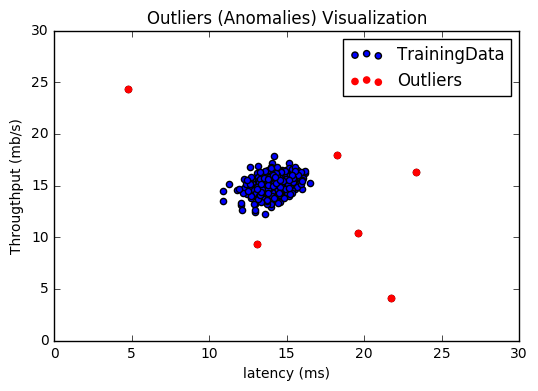

In [142]:
def selectThreshold(y,p):
    '''
    selectThreshold Find the best threshold (epsilon) to use for selecting outliers based on the results from a 
    validation set (p) and the ground truth (y).
    '''
    
    best_f1 = 0
    best_epsilon = 0
    
    stepsize = (max(p) - min(p)) / 1000
    
    epsilon = np.arange(min(p),max(p),stepsize)
    
    for eps in epsilon:
        
        ypred = p<eps
        
        f1 = f1_score(y,ypred)
        
        if f1>best_f1:
            best_f1 = f1
            best_epsilon = eps
            
    return best_epsilon,best_f1


''' 
Now we will find a good epsilon threshold using a cross-validation set probabilities given the estimated 
Gaussian distribution
'''

p_CV = multivariate_normal(mu, sigma2).pdf(XCV)

epsilon, f1 = selectThreshold(yCV,p_CV)

print('Best Threshold (epsilon) found using cross validation: {}\n'.format(epsilon))
print('Best F1 score on cross validation Set: {:.3f}\n'.format(f1))

# using above found threshold to find out the outliers in the training set
outliers = np.where(p_train<epsilon)

# plotting the Training Data and marking the outliers
plt.scatter(Xtrain[:,0],Xtrain[:,1],label='TrainingData')
plt.scatter(Xtrain[outliers,0],Xtrain[outliers,1],color='r',label='Outliers')

# plot aesthetics
plt.legend(loc='best')
plt.xlabel('latency (ms)')
plt.ylabel('Througthput (mb/s)')
plt.title('Outliers (Anomalies) Visualization')
plt.xlim([0,30])
plt.ylim([0,30])
plt.savefig('Data1Outliers.png')

'''
From the plot it is clear that our anomaly detection algorithm is detecting anomalies correctly.
'''
        

# Part 4: Multidimensional Outliers

In [143]:
''' 
We will now use the code from the previous part and apply it to a harder problem in which more features 
describe each datapoint and only some features indicate whether a point is an outlier.
'''

data2 = sio.loadmat('ex8data2.mat')
X2train = data2['X']
X2_CV = data2['Xval']
y2_CV = data2['yval']

# Estimate mean ('mu_2') and variance ('sigma2_2') for training dataset
mu_2 = np.mean(X2train,axis=0)
sigma2_2 = np.var(X2train,axis=0)

# Training set pdf
p2 = multivariate_normal(mu_2, sigma2_2).pdf(X2train)

# Cross-validation set
p2_CV = multivariate_normal(mu_2, sigma2_2).pdf(X2_CV)

# Find the best threshold
epsilon_2, f1_2 = selectThreshold(y2_CV, p2_CV)

print('Best epsilon found using cross-validation: {}\n'.format(epsilon_2))
print('Best F1 on Cross Validation Set:  {:.3f}\n'.format(f1_2))
print('# Outliers found: {}\n'.format(sum(p2 < epsilon_2)))


Best epsilon found using cross-validation: 1.3772288907613604e-18

Best F1 on Cross Validation Set:  0.615

# Outliers found: 117

